In [1]:
#importing the libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
#feature name and their type
with open((r"C:\Users\vaami\OneDrive\Desktop\NIDS\dataset\kddcup.names.txt") ) as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [3]:
#reading the columns in the dataset 
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

#adding a column named 'target'
columns.append('target')
#print(columns)
print(len(columns))

42


In [4]:
#attacks and their attack category
with open((r"C:\Users\vaami\OneDrive\Desktop\NIDS\dataset\training_attack_types.txt") ) as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l


the attacks are divided into categories named: normal, DoS, Probe, R2L, U2R

normal attack category is added

In [5]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}

READING DATASET

In [6]:
#reading kddcup data
path = r"C:\Users\vaami\OneDrive\Desktop\NIDS\dataset\kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

#Adding 'Attack Type' column
df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
df.shape

(494021, 43)

In [8]:
#finding unique values of target column
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [9]:
#finding unique values of attack type column
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [10]:
#data types of the features
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [11]:
#finding missing columns
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'service', 'flag']

CATEGORICAL FEATURES DISTRIBUTION

In [13]:
#Visualizing features in a bargraph.
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

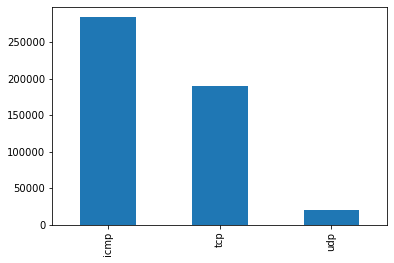

In [14]:
bar_graph('protocol_type')

Protocol type: We notice that ICMP is the most present in the used data, then TCP and almost 20000 packets of UDP type

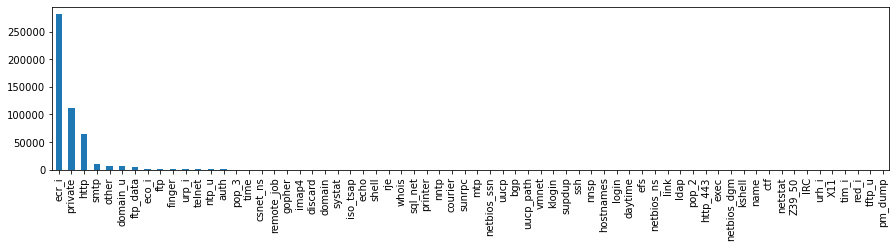

In [15]:
plt.figure(figsize=(15,3))
bar_graph('service')

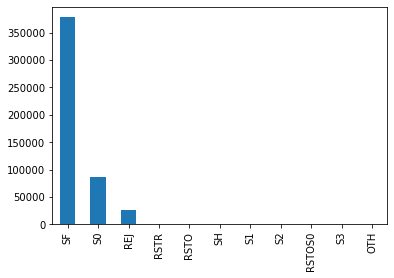

In [16]:
bar_graph('flag')

TARGET FEATURE DISTRIBUTION

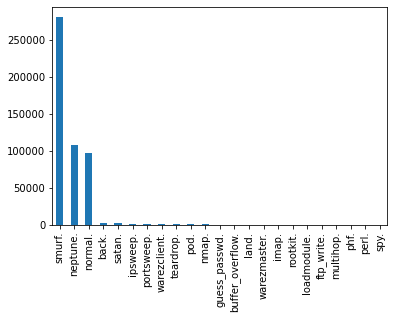

In [17]:
#target feature bar graph.
bar_graph('target')

Attack Type(The attack types grouped by attack, it's what we will predict)

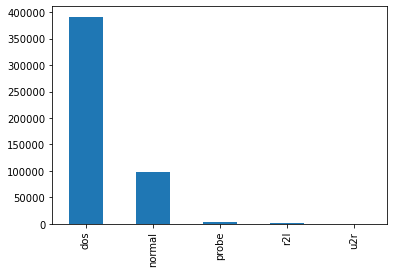

In [18]:
#attack type bar graph
bar_graph('Attack Type')

In [19]:
#viewing the columns
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

DATA CORRELATION

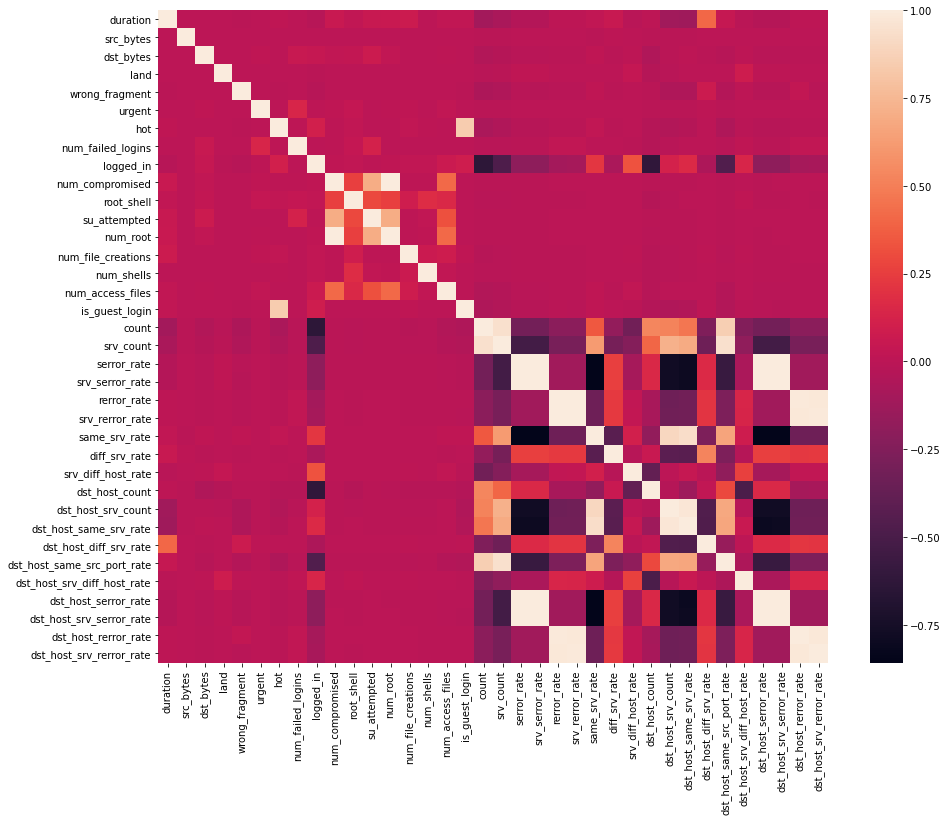

In [20]:
#Data Correlation – Find the highly correlated variables using heatmap and ignore them for analysis.
df = df.dropna('columns')# drop columns with NaN

df = df[[col for col in df if df[col].nunique() > 1]]# keep columns where there are more than 1 unique values

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()


Removing highly corelated values from the dataset

In [21]:
df['num_root'].corr(df['num_compromised'])

0.9938277978735556

In [22]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615072725063

In [23]:
df['srv_count'].corr(df['count'])

0.9436670688882653

In [24]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539818102

In [25]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.9736854572954874

In [26]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173373118

In [27]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371110683

In [28]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342691604

In [29]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630324141

In [30]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676782438

In [31]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.9986729680104874

In [32]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.9978353003739785

In [33]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485679809

In [34]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091849384

In [35]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924956695

In [36]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.982166342730844

In [37]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540750976

In [38]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438845518

In [39]:
#num_root is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
df.drop('num_root',axis = 1,inplace = True)

#srv_serror_rate is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
df.drop('srv_serror_rate',axis = 1,inplace = True)

#srv_rerror_rate is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
df.drop('srv_rerror_rate',axis = 1, inplace=True)

#dst_host_srv_serror_rate is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#dst_host_serror_rate is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)

#dst_host_rerror_rate is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#dst_host_srv_rerror_rate is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#dst_host_same_srv_rate is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9865705438845669)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [40]:
#viewing dataset after removing corelated values from the dataset
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [41]:
#new dimensions of the dataset after removing corelated values from the dataset
df.shape

(494021, 33)

In [42]:
#new column list in the datasets after removing corelated values from the dataset
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [43]:
#values of the features
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

FEATURE MAPPING

In [44]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [45]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [46]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [47]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [48]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [49]:
#Remove irrelevant features such as ‘service’ before modelling
df.drop('service',axis = 1,inplace= True)

In [50]:
#new dataset dimensions
df.shape

(494021, 32)

In [51]:
#new dataset
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [52]:
#data types of the features of the new dataset
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

MODELLING

In [53]:
#for splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
#for scaling features
from sklearn.preprocessing import MinMaxScaler
#for accuracy
from sklearn.metrics import accuracy_score

In [54]:
#splitting the dataset
df = df.drop(['target',], axis=1)
print(df.shape)

# Target variable and train set
Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)
(330994, 30) (163027, 30)
(330994, 1) (163027, 1)


GAUSSIAN NAIVE BAYES

In [55]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [56]:
model1 = GaussianNB()

In [57]:
#training
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [58]:
print("Training time: ",end_time-start_time)

Training time:  0.8999447822570801


In [59]:
#testing
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [60]:
print("Testing time: ",end_time-start_time)

Testing time:  0.6789605617523193


In [61]:
#scores of the model
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804
Test score is: 0.8790384414851528


DECISION TREE

In [62]:
#Decision Tree 
from sklearn.tree import DecisionTreeClassifier

In [63]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [64]:
#training 
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [65]:
print("Training time: ",end_time-start_time)

Training time:  2.2098658084869385


In [66]:
#testing
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [67]:
print("Testing time: ",end_time-start_time)

Testing time:  0.05100202560424805


In [68]:
#scores of the model
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905829108684749
Test score is: 0.9905230421954646


RANDOM FOREST

In [69]:
#random forest
from sklearn.ensemble import RandomForestClassifier

In [70]:
model3 = RandomForestClassifier(n_estimators=30)

In [71]:
#training
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [72]:
print("Training time: ",end_time-start_time)

Training time:  18.241899728775024


In [73]:
#testing
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [74]:
print("Testing time: ",end_time-start_time)

Testing time:  0.8110039234161377


In [75]:
#scores of the model
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999728091747887
Test score is: 0.9996319628037074


SUPPORT VECTOR MACHINE

In [76]:
from sklearn.svm import SVC

In [77]:
model4 = SVC(gamma = 'scale')

In [78]:
#training
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [79]:
print("Training time: ",end_time-start_time)

Training time:  172.186603307724


In [80]:
#testing
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [81]:
print("Testing time: ",end_time-start_time)

Testing time:  38.065701723098755


In [82]:
#scores of the model
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9987552644458811
Test score is: 0.9987916112055059


LOGISTIC REGRESSION

In [83]:
from sklearn.linear_model import LogisticRegression

In [84]:
model5 = LogisticRegression(max_iter=1200000)

In [85]:
#training
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [86]:
print("Training time: ",end_time-start_time)

Training time:  67.42592477798462


In [87]:
#testing
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [88]:
print("Testing time: ",end_time-start_time)

Testing time:  0.038995981216430664


In [89]:
#scores of the model
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9935285835997028
Test score is: 0.9935286792985211


GRADIENT BOOSTING CLASSIFIER

In [90]:
from sklearn.ensemble import GradientBoostingClassifier

In [91]:
model6 = GradientBoostingClassifier(random_state=0)

In [92]:
#training
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [93]:
print("Training time: ",end_time-start_time)

Training time:  592.6456134319305


In [94]:
#testing
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()

In [95]:
print("Testing time: ",end_time-start_time)

Testing time:  2.214815139770508


In [96]:
#scores of the model
print("Train score is:", model6.score(X_train, Y_train))
print("Test score is:", model6.score(X_test,Y_test))

Train score is: 0.9979304760811374
Test score is: 0.9977181693829856


TRAINING TIME

<BarContainer object of 6 artists>

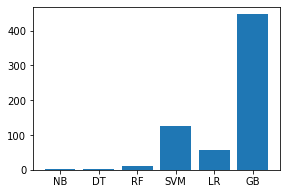

In [97]:
#analyzing the training time of all the models and representing in a bar graph.
names = ['NB','DT','RF','SVM','LR','GB']
values = [1.04721,1.50483,11.45332,126.96016,56.67286,446.69099]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

TESTING TIME

<BarContainer object of 6 artists>

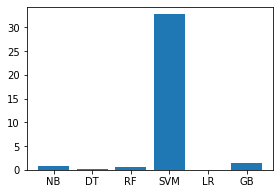

In [98]:
#analyzing the testing time of all the models and representing in a bar graph.
names = ['NB','DT','RF','SVM','LR','GB']
values = [0.79089,0.10471,0.60961,32.72654,0.02198,1.41416]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

TRAINING ACCURACY

<BarContainer object of 6 artists>

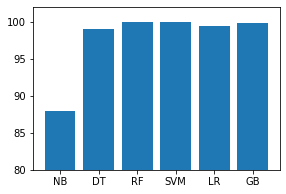

In [99]:
#analyzing the training accuracy of all the models and representing in a bar graph.
names = ['NB','DT','RF','SVM','LR','GB']
values = [87.951,99.058,99.997,99.875,99.352,99.793]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

TESTING ACCURACY

<BarContainer object of 6 artists>

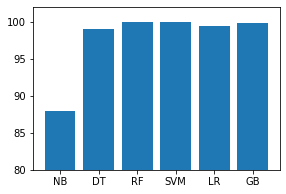

In [100]:
#analyzing the testing accuracy of all the models and representing in a bar graph.
names = ['NB','DT','RF','SVM','LR','GB']
values = [87.903,99.052,99.969,99.879,99.352,99.771]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

**END OF THE PROJECT**